<font color="navyblue">
<center>
<h1>Dense Neural Network</h1>

<h2>Practical Lab 9 </h2>
<center>
</font>
Submitted by Beena Kurian(student ID: 8946601)

### __1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with__

In [112]:
# Import necessary libraries
from keras.datasets import fashion_mnist
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [113]:
# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Data Exploration

In [114]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


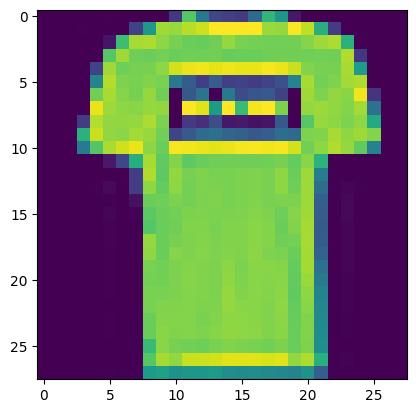

In [115]:
# plot the first image in the training 
import matplotlib.pyplot as plt
plt.imshow(train_images[1])  

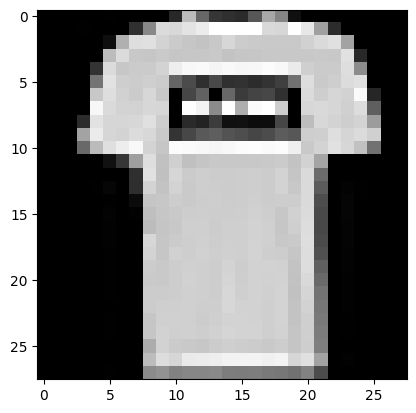

In [116]:
# plot the first image in the training set 
import matplotlib.pyplot as plt
plt.imshow(train_images[1],cmap='gray')  

In [117]:
# print the label of the first image in the training set   
print(f'Label: {train_labels[1]}')

Label: 0


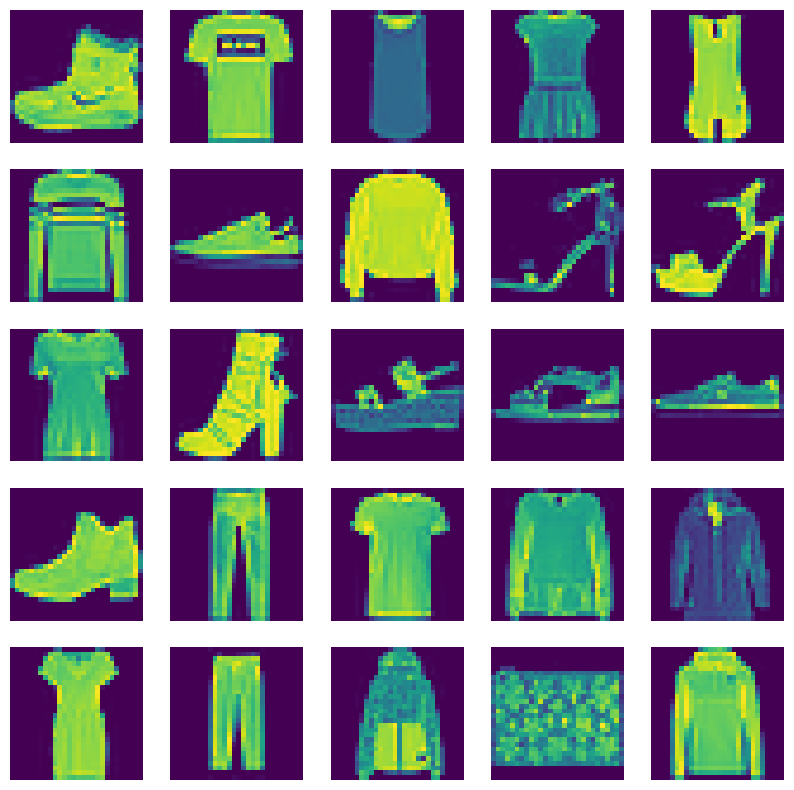

In [118]:
# Visualize a few sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()


In [119]:
# Explore labels
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
unique_labels, counts = np.unique(train_labels, return_counts=True)

for label, count in zip(labels, counts):
    print(f"Label {label}: {count} samples")


Label T-shirt/top: 6000 samples
Label Trouser: 6000 samples
Label Pullover: 6000 samples
Label Dress: 6000 samples
Label Coat: 6000 samples
Label Sandal: 6000 samples
Label Shirt: 6000 samples
Label Sneaker: 6000 samples
Label Bag: 6000 samples
Label Ankle boot: 6000 samples


#### Data preprocessing

In [120]:
# flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
train_images = train_images.reshape((60000, 28 * 28))  
test_images = test_images.reshape((10000, 28 * 28))

# normalizing the data to the range [0,1] by min-max range, and casting it to float32
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


In [121]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


### __2. Train a dense neural network using Keras, try out at least three hyperparameters configurations__

In [158]:
# Defining a dense neural network model
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='rmsprop',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=1500,validation_data=(x_val, y_val))


Epoch 1/10


40/40 [==============================] - 4s 58ms/step - loss: 0.9607 - accuracy: 0.6798 - val_loss: 0.6756 - val_accuracy: 0.7626
Epoch 2/10
40/40 [==============================] - 2s 53ms/step - loss: 0.6200 - accuracy: 0.7804 - val_loss: 0.5336 - val_accuracy: 0.8108
Epoch 3/10
40/40 [==============================] - 2s 47ms/step - loss: 0.5367 - accuracy: 0.8069 - val_loss: 0.4833 - val_accuracy: 0.8282
Epoch 4/10
40/40 [==============================] - 2s 51ms/step - loss: 0.4943 - accuracy: 0.8244 - val_loss: 0.4614 - val_accuracy: 0.8313
Epoch 5/10
40/40 [==============================] - 2s 47ms/step - loss: 0.4601 - accuracy: 0.8334 - val_loss: 0.4458 - val_accuracy: 0.8412
Epoch 6/10
40/40 [==============================] - 2s 47ms/step - loss: 0.4351 - accuracy: 0.8416 - val_loss: 0.4421 - val_accuracy: 0.8379
Epoch 7/10
40/40 [==============================] - 2s 47ms/step - loss: 0.4115 - accuracy: 0.8506 - val_loss: 0.3980 - val_accuracy: 0.8552
Epoch 8/10
40/40 [======

__`model_1` : Hyperparameter `batch_size` reduced from 1500 to 128__

In [123]:
# Define a simple dense neural network
model_1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_1.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model with different hyperparameter configurations
history_1 = model_1.fit(train_images, train_labels, epochs=10, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5628 - accuracy: 0.8006 - val_loss: 0.4045 - val_accuracy: 0.8572
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3866 - accuracy: 0.8583 - val_loss: 0.3298 - val_accuracy: 0.8802
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3399 - accuracy: 0.8756 - val_loss: 0.3089 - val_accuracy: 0.8870
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3134 - accuracy: 0.8848 - val_loss: 0.2981 - val_accuracy: 0.8905
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2933 - accuracy: 0.8907 - val_loss: 0.2755 - val_accuracy: 0.8978
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2780 - accuracy: 0.8974 - val_loss: 0.2518 - val_accuracy: 0.9058
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2649 - accuracy: 0.9005 - val_loss: 0.2470 - val_accuracy: 0.9098
Epoch 

__`model_2` : With a Fixed batch size 128, I increased hyperparameter `epoch` from 10 to 20__

In [161]:
model_2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_2.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_2 = model_2.fit(train_images, train_labels, epochs=20, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.5611 - accuracy: 0.8014 - val_loss: 0.4711 - val_accuracy: 0.8334
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3851 - accuracy: 0.8587 - val_loss: 0.3736 - val_accuracy: 0.8647
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3394 - accuracy: 0.8751 - val_loss: 0.3381 - val_accuracy: 0.8736
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3134 - accuracy: 0.8838 - val_loss: 0.3058 - val_accuracy: 0.8869
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2951 - accuracy: 0.8905 - val_loss: 0.2676 - val_accuracy: 0.9009
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2784 - accuracy: 0.8958 - val_loss: 0.2648 - val_accuracy: 0.9030
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2656 - accuracy: 0.9003 - val_loss: 0.2537 - val_accuracy: 0.9052

__`model_3` : With fixed `batch_size=128` and `epoch=20`, I changed the optimizer from `rmsprop` to `sgd`__

In [162]:
model_3 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_3.compile(optimizer="sgd",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_3 = model_3.fit(train_images, train_labels, epochs=20, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20


469/469 [==============================] - 6s 10ms/step - loss: 1.0037 - accuracy: 0.6994 - val_loss: 0.7237 - val_accuracy: 0.7710
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6507 - accuracy: 0.7921 - val_loss: 0.6121 - val_accuracy: 0.8027
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5768 - accuracy: 0.8125 - val_loss: 0.5623 - val_accuracy: 0.8123
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5370 - accuracy: 0.8228 - val_loss: 0.5274 - val_accuracy: 0.8267
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.5113 - accuracy: 0.8291 - val_loss: 0.5078 - val_accuracy: 0.8288
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4925 - accuracy: 0.8351 - val_loss: 0.4889 - val_accuracy: 0.8348
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4785 - accuracy: 0.8391 - val_loss: 0.4863 - val_accuracy: 0.8342
Epoch 8/20
469/

### __3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration.__

#### Evaluate accuracy for each of the configurations

In [163]:
# Evaluate accuracy for each configuration
accuracy = model.evaluate(test_images, test_labels)[1]
accuracy_1 = model_1.evaluate(test_images, test_labels)[1]
accuracy_2 = model_2.evaluate(test_images, test_labels)[1]
accuracy_3 = model_3.evaluate(test_images, test_labels)[1]
print(f"Accuracy (Base Model): {accuracy}")
print(f"Accuracy (Model 1): {accuracy_1}")
print(f"Accuracy (Model 2): {accuracy_2}")
print(f"Accuracy (Model 3): {accuracy_3}")

  1/313 [..............................] - ETA: 17s - loss: 0.3628 - accuracy: 0.8438

313/313 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.8491
Accuracy (Base Model): 0.8652999997138977
Accuracy (Model 1): 0.8650000095367432
Accuracy (Model 2): 0.8866000175476074
Accuracy (Model 3): 0.8490999937057495


#### Choose the best configuration

In [164]:
# Choose the best configuration
best_config = np.argmax([accuracy_1, accuracy_2, accuracy_3]) + 1

In [165]:
# Report metrics for the best configuration
best_model = [model_1, model_2, model_3][best_config - 1]
y_pred = np.argmax(best_model.predict(test_images), axis=1)

313/313 [==============================] - 2s 4ms/step


In [166]:
conf_matrix = confusion_matrix(test_labels, y_pred)

##### Report accuracy, confusion matrix

In [171]:
# Report accuracy, confusion matrix
print(f"Best Model: {best_config}")
print(f"Test Accuracy: {accuracy_1}")
print("Confusion Matrix:")
print(conf_matrix)

Best Model: 2
Test Accuracy: 0.8650000095367432
Confusion Matrix:
[[918   1  12   8   7   1  50   0   3   0]
 [ 10 967   1  11   6   0   5   0   0   0]
 [ 24   0 773   7 117   0  79   0   0   0]
 [ 54   3  16 855  53   0  16   0   3   0]
 [  1   0  61  17 878   1  41   0   1   0]
 [  0   0   0   1   0 972   0  15   0  12]
 [205   0  54  14 105   0 616   0   6   0]
 [  0   0   0   0   0   9   0 972   1  18]
 [  8   0   4   2   6   3   6   4 967   0]
 [  0   0   0   0   0   6   1  45   0 948]]


In [172]:
# Find indices of incorrectly classified samples
incorrect_indices = np.where(y_pred != test_labels)[0]
incorrect_indices[:10]

array([12, 17, 23, 29, 40, 42, 51, 66, 67, 68], dtype=int64)

#### Examples of incorrect classification

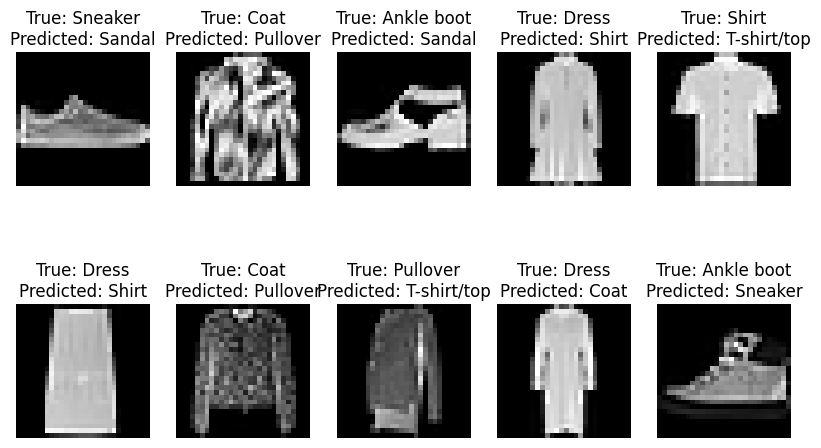

In [173]:
# Display examples of incorrect classification
plt.figure(figsize=(10, 6))
for i, incorrect in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    
    # Reshape the flattened image to its original shape (e.g., 28x28 pixels)
    img = test_images[incorrect].reshape((28, 28))
    
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {labels[test_labels[incorrect]]}\nPredicted: {labels[y_pred[incorrect]]}")
    plt.axis('off')
plt.show()


##### Plot of Training and validation Accuracy

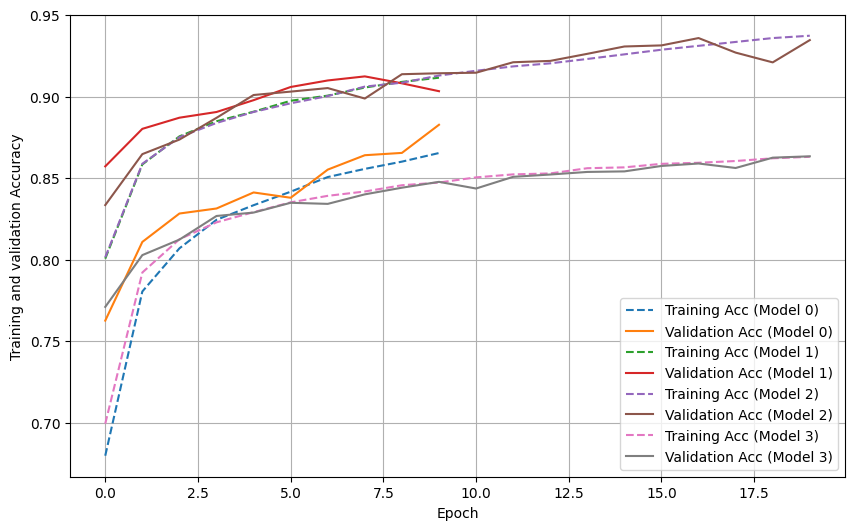

In [174]:
import matplotlib.pyplot as plt

def plot_accuracies(histories, labels):
    plt.figure(figsize=(10, 6))
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Training Acc ({labels[i]})', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'Validation Acc ({labels[i]})')

    plt.xlabel('Epoch')
    plt.ylabel('Training and validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

history_list = [history, history_1, history_2, history_3]
label_list = ['Model 0', 'Model 1', 'Model 2', 'Model 3']

plot_accuracies(history_list, label_list)


## __CONCLUSIONS__

Model Configurations:

* Base Model :

    * Hidden Layer: 512 units, ReLU activation
    * Output Layer: 10 units (assuming this is a classification task), Softmax activation
    * Training Configuration: `10 epochs, batch size of 1500, optimizer is rmsprep`
    * Accuracy on test data: 86.53%

* Model 2:

    * Hidden Layer: 512 units, ReLU activation
    * Output Layer: 10 units, Softmax activation
    * Training Configuration: `10 epochs, batch size of 128, optimizer is rmsprop`
    * Accuracy on test data: 86.50%

* Model 2:

    * Hidden Layer: 512 units, ReLU activation
    * Output Layer: 10 units, Softmax activation
    * Training Configuration: `20 epochs, batch size of 128, optimizer is rmsprop`
    * Accuracy on test data: 88.66%

* Model 3:

    * Hidden Layer: 512 units, ReLU activation
    * Output Layer: 10 units, Softmax activation
    * Training Configuration: `20 epochs, batch size of 128, optimizer is sgd`
    * Accuracy on test data: Accuracy: 84.90%

##### __My insights__:
    * Decreasing batch size reduces processing time without significant impact on accuracy, which is a very important practical enhancement.
    * Increasing the epoch increases accuracy for training,validation, and test datasets. However, we should choose the number of epoches carefully to prevent overfitting.
    * Changing the optimizer from rmsprop to sgd reduced the accuracy. This signifies that different optimizers work differently with different datasets. So,  we should also tune our optimizer to get the best results.



##### __BEST MODEL__ 
* MODEL 2 